plot the fragmentation level of primary forest 

In [1]:
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as plticker
import matplotlib
from osgeo import gdal_array


def subplot(ax1, array_year, pf_patch_count, pf_patch_size,
            x_axis_interval=3,
            y_axis_interval=None,
            title=None,
            plot_legend=False):

    legend_size = 22
    tick_label_size = 24
    axis_label_size = 27
    title_label_size = 30
    tick_length = 4
    lw = 2.5

    ax1.plot(array_year, pf_patch_count, label='patch number', color='#4c72b0', linewidth=lw, linestyle='solid',
             marker='o', markersize=9, markerfacecolor='#4c72b0',
             markeredgewidth=2, markeredgecolor='#4c72b0'
             )

    ax1.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    ax1.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=True, which='major', colors='#4c72b0')

    ax1.set_xlabel('year', size=axis_label_size)
    # ax1.set_ylabel('patch number', size=axis_label_size, color='#4c72b0')
    ax1.set_ylabel('patch density (N/100km$\mathregular{^2}$)', size=axis_label_size, color='#4c72b0')

    if y_axis_interval is None:
        pass
    else:
        ax1.yaxis.set_major_locator(plticker.MultipleLocator(base=y_axis_interval))

    ax1.xaxis.set_major_locator(plticker.MultipleLocator(base=x_axis_interval))

    ax1.yaxis.offsetText.set_fontsize(tick_label_size)
    ax1.set_title(title, fontsize=title_label_size)

    ax2 = ax1.twinx()
    ax2.plot(array_year, pf_patch_size, label='mean patch size', color='#ff4500',
             linewidth=lw, linestyle='solid',
             marker='s', markersize=8, markerfacecolor='#ff4500',
             markeredgewidth=2, markeredgecolor='#ff4500'
             )

    ax2.tick_params('x', labelsize=tick_label_size, direction='out', length=tick_length, bottom=True, which='major')
    ax2.tick_params('y', labelsize=tick_label_size, direction='out', length=tick_length, left=False, which='major', colors='#ff4500')

    ax2.set_ylabel('mean patch area (ha)', size=axis_label_size, color='#ff4500')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

    if plot_legend:
        ax1.legend(lines + lines2, labels + labels2, loc='best', fontsize=legend_size, frameon=False)

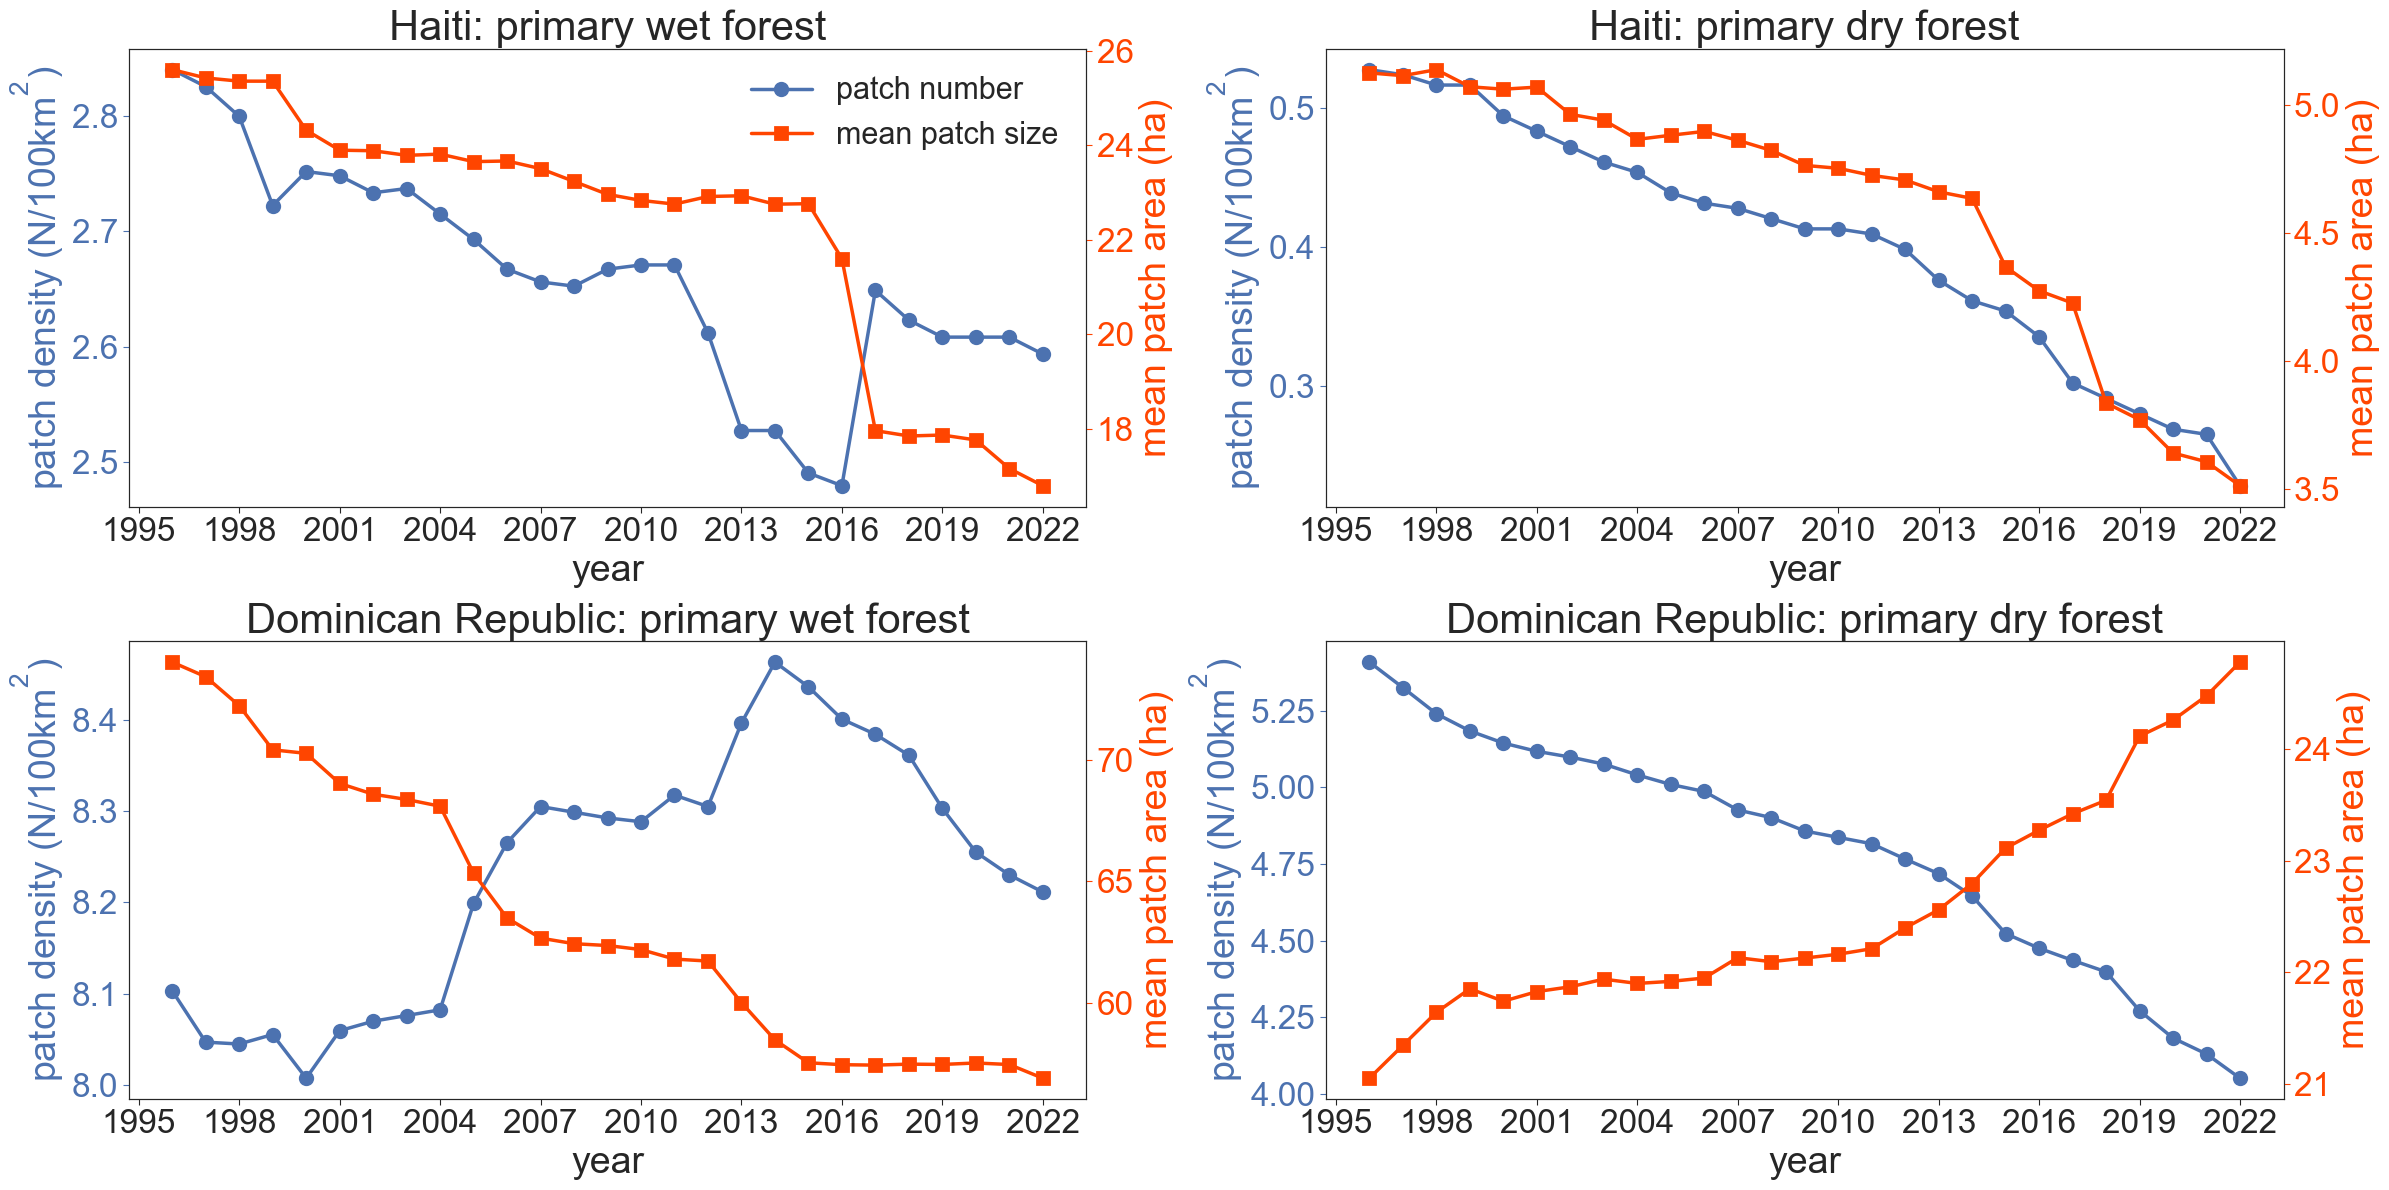

In [2]:
pwd = os.getcwd()
rootpath = os.path.abspath(os.path.join(pwd, '..'))

img_country_id = gdal_array.LoadFile(join(rootpath, 'data', 'hispaniola_polygon', 'countryid_hispaniola.tif'))

filename = join(rootpath, 'results', 'pf_landscape_metrix.xlsx')
df = pd.read_excel(filename)   # read the data

array_year = np.arange(1996, 2023)

sns.set_style('white')

title = None

y_label = 'patch number'
x_axis_interval = 3
y_axis_interval = None

matplotlib.rcParams['font.family'] = 'Arial'
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24, 12))

for i in range(0, 2):
    for j in range(0, 2):

        if (i == 0) & (j == 0):
            ax1 = axes[i, j]

            pf_patch_count = df['value'].values[(df['country'] == 'haiti') & (df['pf_flag'] == 'wet') & (df['patch_flag'] == 'count')]
            pf_patch_size = df['value'].values[(df['country'] == 'haiti') & (df['pf_flag'] == 'wet') & (df['patch_flag'] == 'mean_size')]

            # calculate the primary forest patch count per 100 km2
            pf_patch_density = pf_patch_count / (np.count_nonzero(img_country_id == 1) * 900 / 1000 / 1000 / 100)

            subplot(ax1, array_year, pf_patch_density, pf_patch_size * 900 / 10000, x_axis_interval=3, y_axis_interval=None,
                    title='Haiti: primary wet forest', plot_legend=True)

        elif (i == 0) & (j == 1):
            ax1 = axes[i, j]

            pf_patch_count = df['value'].values[(df['country'] == 'haiti') & (df['pf_flag'] == 'dry') & (df['patch_flag'] == 'count')]
            pf_patch_size = df['value'].values[(df['country'] == 'haiti') & (df['pf_flag'] == 'dry') & (df['patch_flag'] == 'mean_size')]

            pf_patch_density = pf_patch_count / (np.count_nonzero(img_country_id == 1) * 900 / 1000 / 1000 / 100)

            subplot(ax1, array_year, pf_patch_density, pf_patch_size * 900 / 10000, x_axis_interval=3, y_axis_interval=None,
                    title='Haiti: primary dry forest')

        elif (i == 1) & (j == 0):
            ax1 = axes[i, j]

            pf_patch_count = df['value'].values[(df['country'] == 'dr') & (df['pf_flag'] == 'wet') & (df['patch_flag'] == 'count')]
            pf_patch_size = df['value'].values[(df['country'] == 'dr') & (df['pf_flag'] == 'wet') & (df['patch_flag'] == 'mean_size')]

            pf_patch_density = pf_patch_count / (np.count_nonzero(img_country_id == 2) * 900 / 1000 / 1000 / 100)

            subplot(ax1, array_year, pf_patch_density, pf_patch_size * 900 / 10000, x_axis_interval=3, y_axis_interval=None,
                    title='Dominican Republic: primary wet forest')

        else:
            ax1 = axes[i, j]

            pf_patch_count = df['value'].values[(df['country'] == 'dr') & (df['pf_flag'] == 'dry') & (df['patch_flag'] == 'count')]
            pf_patch_size = df['value'].values[(df['country'] == 'dr') & (df['pf_flag'] == 'dry') & (df['patch_flag'] == 'mean_size')]

            pf_patch_density = pf_patch_count / (np.count_nonzero(img_country_id == 2) * 900 / 1000 / 1000 / 100)

            subplot(ax1, array_year, pf_patch_density, pf_patch_size * 900 / 10000, x_axis_interval=3, y_axis_interval=None,
                    title='Dominican Republic: primary dry forest')

plt.tight_layout()
plt.show()
